In [23]:
%pylab inline
plt.rcParams["figure.figsize"] = [20,10]

Populating the interactive namespace from numpy and matplotlib


In [24]:
# This cell makes sure that you have all the necessary libraries installed
import sys
import platform
from importlib.util import find_spec, module_from_spec
import numpy as np
import matplotlib.pyplot as plt

def check_newer_version(version_inst, version_nec):
    version_inst_split = version_inst.split('.')
    version_nec_split = version_nec.split('.')
    for i in range(min(len(version_inst_split), len(version_nec_split))):
        if int(version_nec_split[i]) > int(version_inst_split[i]):
            return False
        elif int(version_nec_split[i]) < int(version_inst_split[i]):
            return True
    return True


module_list = [('jupyter', '1.0.0'), 
               ('matplotlib', '2.0.2'), 
               ('numpy', '1.13.1'), 
               ('python', '3.6.2'), 
               ('sklearn', '0.19.0'), 
               ('scipy', '0.19.1'), 
               ('nb_conda', '2.2.1')]

packages_correct = True
packages_errors = []

for module_name, version in module_list:
    if module_name == 'scikit-learn':
        module_name = 'sklearn'
    if 'python' in module_name:
        python_version = platform.python_version()
        if not check_newer_version(python_version, version):
            packages_correct = False
            error = f'Update {module_name} to version {version}. Current version is {python_version}.'
            packages_errors.append(error) 
            print(error)
    else:
        spec = find_spec(module_name)
        if spec is None:
            packages_correct = False
            error = f'Install {module_name} with version {version} or newer'
            packages_errors.append(error) 
            print(error)
        else:
            x = __import__(module_name)
            if hasattr(x, '__version__') and not check_newer_version(x.__version__, version):
                packages_correct = False
                error = f'Update {module_name} to version {version}. Current version is {x.__version__}.'
                packages_errors.append(error) 
                print(error)

try:
    from google.colab import drive
    packages_correct = False
    error = """Please, don't use google colab!
It will make it much more complicated for us to check your homework as it merges all the cells into one."""
    packages_errors.append(error) 
    print(error)
except:
    pass

packages_errors = '\n'.join(packages_errors)

Install nb_conda with version 2.2.1 or newer


## Part 2: Bayesian Linear (Polynomial) Regression

### Sine 2 

First a function to generate periodic data is created. 

The method has a parameter $N$ and returns $N$-dimensional vectors $\bx$ and $\bt$, where the $\bx$ values drawn from a uniform distribution between $0$ and $2 \pi$ and the elements $t_i$ of $\bt$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $\bf{x}$, the mean $\mu_i = \sin(x_i)$ and the standard deviation $\sigma = 0.25$.

In [13]:
def gen_sine2(n):
    
    x = np.random.uniform(0, 2*pi, n)
    t = np.random.normal(np.sin(x), 0.25)
    
    return x, t


In [14]:
### Test your function
np.random.seed(42)
N = 10
x, t = gen_sine2(N)

assert x.shape == (N,), "the shape of x is incorrect"
assert t.shape == (N,), "the shape of t is incorrect"


### 2.2 Compute Posterior (15 points)

You're going to implement a Bayesian linear regression model, and fit it to the periodic data. Your regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(\bw \;|\; \alpha) = \mathcal{N}(\bw \;|\; 0, \alpha^{-1} \bI)$$

The covariance and mean of the posterior are given by:

$$S_N= \left( \alpha \bI + \beta \bPhi^T \bPhi \right)^{-1} $$
$$m_N = \beta\; \bS_N \bPhi^T \bt$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 
See MLPR chapter 3.3 for background.

Write a method `fit_polynomial_bayes(x, t, M, alpha, beta)` that returns the mean $\bm_N$ and covariance $\bS_N$ of the posterior for a $M$-th order polynomial. In addition it should return the design matrix $\bPhi$. The arguments `x`, `t` and `M` have the same meaning as in question 1.2.

In [15]:
def fit_polynomial_bayes(x, t, M, alpha, beta):

    Phi = np.array([x**i for i in range(M+1)]).T
    S = np.linalg.inv(alpha*np.identity(M+1) + beta*Phi.T@Phi)
    m = beta*S@Phi.T@t
    
    return m, S, Phi


In [16]:
def fit_polynomial_bayes(x, t, M, alpha, beta):

    Phi = np.array([x**i for i in range(M+1)]).T
    S = np.linalg.inv(alpha*np.identity(M+1) + beta*Phi.T@Phi)
    m = beta*S@Phi.T@t
    
    return m, S, Phi


### 2.3 Prediction (10 points)

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; \bx, \bt, \alpha, \beta) = \mathcal{N}(t \;|\; \bm_N^T \phi(\bx), \sigma_N^2(\bx))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(\bx)^T \bS_N \phi(\bx) $$

where $\phi(\bx)$ are the computed features for a new datapoint $\bx$, and $t$ is the predicted variable for datapoint $\bx$. 

Write a function that `predict_polynomial_bayes(x, m, S, beta)` that returns the predictive mean, variance and design matrix $\bPhi$ given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [17]:
def predict_polynomial_bayes(x, m, S, beta):

    comp_feat = np.array([x**i for i in range(M+1)])
    Phi = comp_feat.T
    mean = m.T@comp_feat   
    sigma = (1/beta + comp_feat.T@S@comp_feat).diagonal()    
    
    return mean, sigma, Phi


In [18]:
### Test your function
np.random.seed(42)
N = 10
x = np.linspace(-1, 1, N)
m = np.random.rand(3)
S = np.random.rand(3, 3)
beta = 16
mean, sigma, Phi = predict_polynomial_bayes(x, m, S, beta)

assert mean.shape == (N,), "the shape of mean is incorrect"
assert sigma.shape == (N,), "the shape of sigma is incorrect"
assert Phi.shape == (N, m.shape[0]), "the shape of Phi is incorrect"


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 3)

### 2.4 Plot predictive distribution (10 points)

a) (5 points) Generate 10 datapoints with `gen_sine2(10)`. Compute the posterior mean and covariance for a Bayesian polynomial regression model with $M=4$, $\alpha=\frac{2}{5}$ and $\beta=\frac{1}{0.25^2}$.
Plot the Bayesian predictive distribution, where you plot (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and the predictive standard deviation using `plt.fill_between(..., alpha=0.1)` (the alpha argument induces transparency).

Include the datapoints in your plot.


Text(0.5, 1.0, 'Bayesian Predictive Distribution')

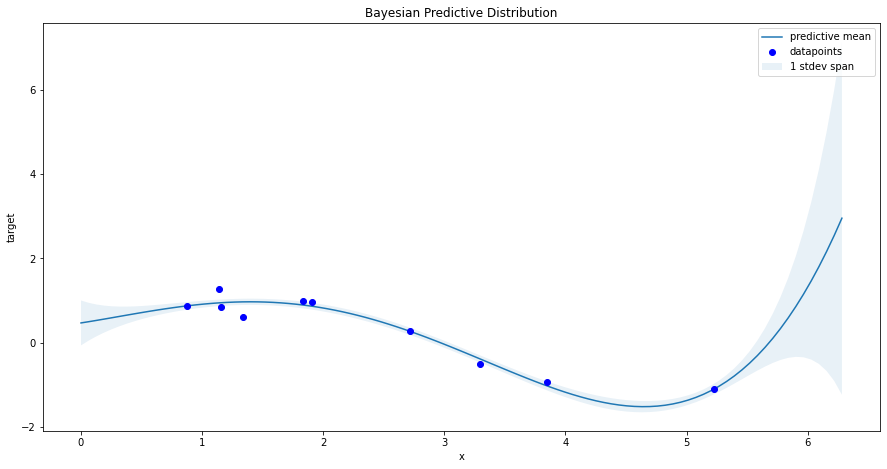

In [19]:
M = 4
alpha = 2/5
beta = 1/(0.25**2)

x, t = gen_sine2(10)
m, S, Phi = fit_polynomial_bayes(x, t, M, alpha, beta)

X = np.linspace(0, 2*pi, 100)
mean, sigma, Phi = predict_polynomial_bayes(X, m, S, beta)

plt.figure(figsize=[15,7.5], edgecolor='black')
plt.plot(X, mean, label='predictive mean')
plt.fill_between(X, mean+sigma, mean-sigma, alpha=0.1, label='1 stdev span')
plt.plot(x, t, 'bo', label='datapoints')
plt.legend()
plt.xlabel('x')
plt.ylabel('target')
plt.title('Bayesian Predictive Distribution')


In [20]:
b) (5 points) For a second plot, draw 100 samples from the parameters' posterior distribution. Each of these samples is a certain choice of parameters for 4-th order polynomial regression. 
Display each of these 100 polynomials.


SyntaxError: invalid syntax (<ipython-input-20-3d86371dcd79>, line 1)

Text(0.5, 1.0, '4-th order polynomials with coefficients drawn from posterior distribution')

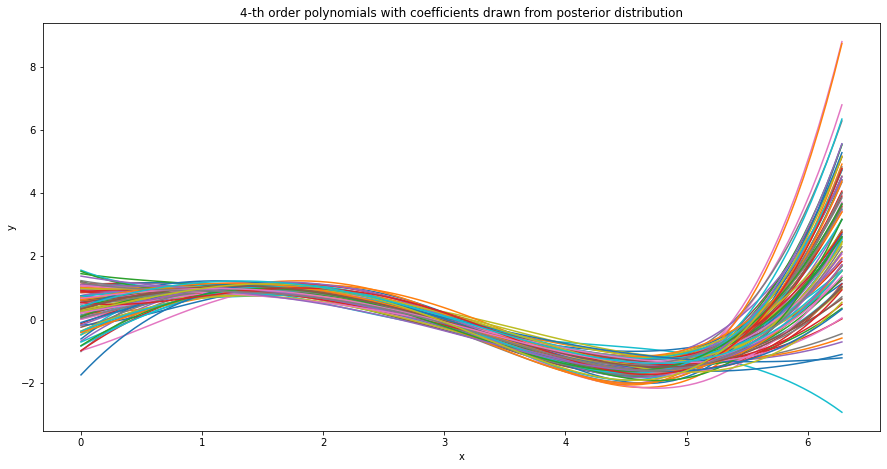

In [21]:
#Posterior distribution is normally distributed
w = np.random.multivariate_normal(m,S,100)
X = np.linspace(0, 2*pi, 100)

plt.figure(figsize=[15,7.5], edgecolor='black')

for i in range(w.shape[0]):
    beta = w[i,:]
    beta_f = np.flip(beta, 0) #np.poly1d takes the coefficients in decreasing power as input
    poly = np.poly1d(beta_f)
    y = poly(X)
    plt.plot(X,y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('4-th order polynomials with coefficients drawn from posterior distribution')
        
